# 3. Polynomial Regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

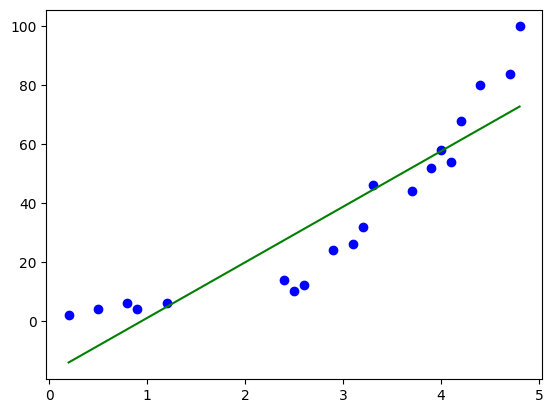

In [48]:
plt.scatter(X,y,color='blue')
plt.plot(X, reg.predict(X),color='green')
plt.show()

In [50]:
reg.score(X,y)


0.8169296513411765

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5]

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [52]:
poly_reg.get_feature_names_out()


array(['1', 'hour', 'hour^2'], dtype=object)

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

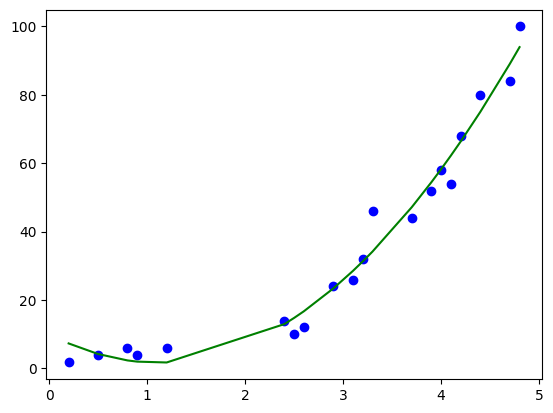

In [59]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.show()

In [62]:
X_range=np.arange(min(X), max(X), 0.1) # X의 최솟값에서 최댓값까지의 범위를 0.1단위로 잘라서 데이터를 생성
X_range

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

In [63]:
X[:5]

,hour
0,0.2
1,0.5
2,0.8
3,0.9
4,1.2
